<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Important-Scripts" data-toc-modified-id="Important-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Important Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Log-transform-large-values" data-toc-modified-id="Log-transform-large-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Log transform large values</a></span></li><li><span><a href="#Train-Test-split-after-log-transform" data-toc-modified-id="Train-Test-split-after-log-transform-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train-Test split after log transform</a></span></li><li><span><a href="#Scaling-the-Data" data-toc-modified-id="Scaling-the-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scaling the Data</a></span></li><li><span><a href="#GBR-Modelling" data-toc-modified-id="GBR-Modelling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>GBR Modelling</a></span></li><li><span><a href="#GBR-modelling-using-pipeline" data-toc-modified-id="GBR-modelling-using-pipeline-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>GBR modelling using pipeline</a></span></li><li><span><a href="#Cross-Validation-Results" data-toc-modified-id="Cross-Validation-Results-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Cross Validation Results</a></span></li><li><span><a href="#HPO-(Hyper-Parameters-Optimization)" data-toc-modified-id="HPO-(Hyper-Parameters-Optimization)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>HPO (Hyper Parameters Optimization)</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-for-Gradient-Boosting-Regressor" data-toc-modified-id="Grid-Search-for-Gradient-Boosting-Regressor-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Grid Search for Gradient Boosting Regressor</a></span></li></ul></li><li><span><a href="#Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor" data-toc-modified-id="Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Hyper Parameter using hyperopt-sklearn for Gradient Boosting Regressor</a></span></li><li><span><a href="#Scale-data-for-hyperparameter-tuning" data-toc-modified-id="Scale-data-for-hyperparameter-tuning-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Scale data for hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#HPO-without-scaling-the-data" data-toc-modified-id="HPO-without-scaling-the-data-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>HPO without scaling the data</a></span></li></ul></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Data Description

This dataset contains house sale prices for King County,
which includes Seattle.
It includes homes sold between May 2014 and May 2015.

- Dependent features: 1 (price)
- Features : 19 home features
- Id:  1 house ID

Task: Estimate the price based on given features.

![](images/data_description.png)

## Model Introduction
The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms:
```
sklearn.ensemble.GradientBoostingRegressor
xgboost.XGBRegressor # fast and best
lightgbm.LGBMRegressor # extreme fast, little acc than xgb
catboost.CatBoostRegressor # good for categorical feats
```

- [catboost examples](https://catboost.ai/docs/concepts/python-usages-examples.html)

# Imports

In [1]:
import time
time_start_notebook = time.time()

In [2]:
# colab

In [3]:
%%capture
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    #!pip install hpsklearn
    !pip install shap eli5
    !pip install catboost
    !pip install ipywidgets
    !jupyter nbextension enable --py widgetsnbextension

    # set OMP_NUM_THREADS=1 for hpsklearn package
    #!export OMP_NUM_THREADS=1
    print('Environment: Google Colab')

In [4]:
# imports

In [5]:
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# mixed

import six
import pickle
import joblib
import os
import time
import scipy

# random state
SEED=100
np.random.seed(SEED) # we need this in each cell


# sklearn
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# boosting
import xgboost as xgb
import lightgbm as lgb
import catboost

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier, DMatrix
from lightgbm import LGBMClassifier, Dataset
from catboost import CatBoostClassifier, Pool, CatBoost

# model evaluation using snap
import shap
# shap_values = shap.TreeExplainer(model_xgb).shap_values(Xtest)
# shap.summary_plot(shap_values, Xtest)
# shap.dependence_plot("column_name", shap_values, Xtest)

# versions
import watermark
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

Bhishan Poudel 2020-11-02 

CPython 3.7.7
IPython 7.18.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

xgboost    1.2.0
catboost   0.23.2
watermark  2.0.2
six        1.15.0
matplotlib 3.2.1
numpy      1.18.4
scipy      1.4.1
seaborn    0.11.0
joblib     0.17.0
sklearn    0.23.1
lightgbm   2.3.1
shap       0.35.0
pandas     1.1.0



# Important Scripts

In [6]:
df_eval = pd.DataFrame({'Model': [],
                        'Details':[],
                        'Train Neg MSE K-Fold Cross Validation':[],
                        'Test RMSE':[],
                        'Test Explained Variance Score':[],
                        'Test R-squared':[],
                        'Test Adjusted R-squared':[],
                        })

In [7]:
def show_methods(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

In [8]:
def adjustedR2(rsquared,nrows,ncols):
    """
    Adjusted r-squared depends on number of rows and columns of Test data.

    It reduces the value of original r-squared value.
    """
    return rsquared- (ncols-1)/(nrows-ncols) * (1-rsquared)

# Load the data

In [9]:
df = pd.read_csv('../data/raw/kc_house_data.csv')
print(df.columns)
print(df.shape)
df.head(2)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
(21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15  
0        5650  
1        7639  

[2 rows x 21 columns]

# Feature selection

In [10]:
features_raw_all = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

cols_drop = ['id','date']
df = df.drop(cols_drop,axis=1)


dict_features = dict(enumerate(features_raw_all))
print(dict_features)

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'waterfront', 6: 'view', 7: 'condition', 8: 'grade', 9: 'sqft_above', 10: 'sqft_basement', 11: 'yr_built', 12: 'yr_renovated', 13: 'zipcode', 14: 'lat', 15: 'long', 16: 'sqft_living15', 17: 'sqft_lot15'}


# Log transform large values

In [11]:
cols_log = ['price','sqft_living','sqft_living15','sqft_lot','sqft_lot15']

for col in cols_log:
    df[col] = np.log1p(df[col].to_numpy())

# Train-Test split after log transform

In [12]:
X = df[features_raw_all].to_numpy()

y = df['price'].to_numpy()

Xtrain_orig, Xtest, ytrain_orig, ytest = train_test_split (X,y,
                                                 test_size=0.20,
                                                 random_state=SEED)

df_Xtrain_orig = pd.DataFrame(Xtrain_orig, columns=features_raw_all)
df_Xtest = pd.DataFrame(Xtest, columns=features_raw_all)

Xtrain_orig.shape, ytrain_orig.shape, Xtest.shape, ytest.shape, Xtrain_orig[0][:2], Xtest[0][:2]

((17290, 18),
 (17290,),
 (4323, 18),
 (4323,),
 array([3.  , 1.75]),
 array([3. , 2.5]))

# Train-Validation Split

In [13]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain_orig, ytrain_orig,
                                                  random_state=SEED, test_size=0.2)

df_Xtrain = pd.DataFrame(Xtrain, columns=features_raw_all)
df_Xvalid = pd.DataFrame(Xvalid, columns=features_raw_all)


df_Xtrain.head()

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0       5.0       3.00     8.243019  10.652944     1.5         0.0   0.0   
1       3.0       2.50     7.890208   8.517393     2.0         0.0   3.0   
2       2.0       1.00     7.359468   8.456381     1.5         0.0   1.0   
3       1.0       0.75     6.381816   8.639588     1.0         0.0   0.0   
4       3.0       1.00     7.123673   8.294300     1.5         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        4.0    9.0      3800.0            0.0    1984.0           0.0   
1        5.0    9.0      2000.0          670.0    1942.0        1995.0   
2        3.0    8.0      1570.0            0.0    1931.0           0.0   
3        3.0    6.0       590.0            0.0    1944.0           0.0   
4        3.0    8.0      1240.0            0.0    1928.0        2000.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0  98042.0  47.3488 -122.095       7.855932   10.485033  
1  98144.0  47.5855 -122.292       7.749753    8.517393  
2  98136.0  47.5256 -122.392       7.507141    8.456381  
3  98118.0  47.5181 -122.267       6.888572    8.639588  
4  98106.0  47.5467 -122.359       7.090910    9.781772

In [14]:
cols_int = ['bedrooms','waterfront','view','condition','grade','zipcode']

for c in cols_int:
    df_Xtrain[c] = df_Xtrain[c].astype(int)
    df_Xtest[c] = df_Xtest[c].astype(int)
    df_Xvalid[c] = df_Xvalid[c].astype(int)

In [15]:
df_Xtrain.head()

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5       3.00     8.243019  10.652944     1.5           0     0   
1         3       2.50     7.890208   8.517393     2.0           0     3   
2         2       1.00     7.359468   8.456381     1.5           0     1   
3         1       0.75     6.381816   8.639588     1.0           0     0   
4         3       1.00     7.123673   8.294300     1.5           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   
2          3      8      1570.0            0.0    1931.0           0.0   
3          3      6       590.0            0.0    1944.0           0.0   
4          3      8      1240.0            0.0    1928.0        2000.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393  
2    98136  47.5256 -122.392       7.507141    8.456381  
3    98118  47.5181 -122.267       6.888572    8.639588  
4    98106  47.5467 -122.359       7.090910    9.781772

# Scaling the Data

In [16]:
scaler = StandardScaler() # standard scaler better for regression
scaler.fit(Xtrain_orig)

StandardScaler()

# Modelling catboost
https://catboost.ai/docs/concepts/python-reference_catboostregressor.html
```python
class CatBoostRegressor(iterations=None,learning_rate=None,depth=None,
l2_leaf_reg=None,model_size_reg=None,rsm=None,loss_function='RMSE',
border_count=None,feature_border_type=None
per_float_feature_quantization=None,input_borders=None,
output_borders=None,fold_permutation_block=None,od_pval=None,
od_wait=None,od_type=None,nan_mode=None,counter_calc_method=None,
leaf_estimation_iterations=None,leaf_estimation_method=None,
thread_count=None,random_seed=None,use_best_model=None,
best_model_min_trees=None,verbose=None,silent=None,logging_level=None,
metric_period=None,ctr_leaf_count_limit=None,store_all_simple_ctr=None,
max_ctr_complexity=None,
has_time=None,allow_const_label=None,one_hot_max_size=None,
random_strength=None,name=None,ignored_features=None,
train_dir=None,custom_metric=None,eval_metric=None,
bagging_temperature=None,save_snapshot=None,
snapshot_file=None,snapshot_interval=None,
fold_len_multiplier=None,used_ram_limit=None,gpu_ram_part=None,
pinned_memory_size=None,allow_writing_files=None,
final_ctr_computation_mode=None,approx_on_full_history=None,
boosting_type=None,simple_ctr=None,combinations_ctr=None,
per_feature_ctr=None,ctr_target_border_count=None,task_type=None,
device_config=None,devices=None,bootstrap_type=None,subsample=None,
sampling_unit=None,dev_score_calc_obj_block_size=None,
max_depth=None,n_estimators=None,num_boost_round=None,
num_trees=None,colsample_bylevel=None,random_state=None,
reg_lambda=None,objective=None,eta=None,max_bin=None,
gpu_cat_features_storage=None,data_partition=None,
metadata=None,early_stopping_rounds=None,cat_features=None,
grow_policy=None,min_data_in_leaf=None,min_child_samples=None,
max_leaves=None,num_leaves=None,score_function=None,
leaf_estimation_backtracking=None,ctr_history_unit=None,
monotone_constraints=None)
```


In [17]:
import catboost
show_methods(catboost)

Object Type: <class 'module'>



0                  1                            2  \
0            CatBoost  CatBoostRegressor                 FeaturesData   
1  CatBoostClassifier      CatboostError             MetricVisualizer   
2       CatBoostError          EFstrType  MultiRegressionCustomMetric   

                                3              4             5        6  
0  MultiRegressionCustomObjective             cv  to_regressor  version  
1                            Pool     sum_models         train   widget  
2                            core  to_classifier

In [18]:
from catboost import CatBoostRegressor, Pool

show_methods(CatBoostRegressor)

Object Type: <class 'type'>



0                     1                        2  \
0          best_iteration_  drop_unused_features           get_best_score   
1              best_score_          eval_metrics              get_borders   
2  calc_feature_statistics         evals_result_  get_cat_feature_indices   
3        calc_leaf_indexes  feature_importances_         get_evals_result   
4                 classes_        feature_names_   get_feature_importance   
5                  compare                   fit          get_leaf_values   
6                     copy        get_all_params         get_leaf_weights   
7     create_metric_calcer    get_best_iteration             get_metadata   

                          3                        4                  5  \
0     get_object_importance              grid_search          plot_tree   
1                 get_param                is_fitted            predict   
2                get_params     iterate_leaf_indexes       random_seed_   
3        get_scale_and_bias           learning_rate_  randomized_search   
4             get_test_eval               load_model       save_borders   
5            get_test_evals  plot_partial_dependence         save_model   
6  get_text_feature_indices         plot_predictions              score   
7      get_tree_leaf_counts                                               

                    6  
0   set_feature_names  
1     set_leaf_values  
2          set_params  
3  set_scale_and_bias  
4              shrink  
5      staged_predict  
6         tree_count_  
7

In [19]:
# help(CatBoostRegressor)

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from catboost import CatBoostRegressor

# time
time_start = time.time()

# current parameters
desc = 'default,log+standard scaling,random_state=0, numpy'

Xtr = scaler.transform(Xtrain)
Xtx = scaler.transform(Xtest)

ytr,ytx = ytrain, ytest

"""
default,log+standard scaling,random_state=0
numpy : Xtrain_scaled, Xtest_scaled ==> 0.900584
pandas: df_Xtrain_scaled, df_Xtest_scaled ==> -0.054372

"""

# fit the model
model_cat = CatBoostRegressor(verbose=1000,random_state=0)

model_cat.fit(Xtr, ytr)

# fitted model
model = model_cat


# save the model
# joblib.dump(model_cat, 'model_cat.pkl')
# model_cat = joblib.load('model_cat.pkl')

# train validation
kf = sklearn.model_selection.KFold(5,shuffle=True,random_state=SEED)
cvs = cross_val_score(model, Xtr, ytr,cv=kf,
                      scoring = "neg_mean_squared_error")
score = cvs.mean()

# ypreds
ypreds = model.predict(Xtx)

# NOTE: if we have log1p transform the target, we need to get it back
ytx_back = np.expm1(ytx)
ypreds_back = np.expm1(ypreds)

# rmse
rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytx_back,ypreds_back))

# expalined variance
evs = explained_variance_score(ytx_back, ypreds_back)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx_back, ypreds_back)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])


row_eval = ['catboost', 
            desc,
            score,rmse,evs,r2,ar2]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

# results
display(df_eval)

Learning rate set to 0.062299
0:	learn: 0.5034625	total: 73.8ms	remaining: 1m 13s
999:	learn: 0.1265719	total: 5.94s	remaining: 0us
Learning rate set to 0.059872
0:	learn: 0.5040696	total: 9.69ms	remaining: 9.68s
999:	learn: 0.1239256	total: 3.52s	remaining: 0us
Learning rate set to 0.059872
0:	learn: 0.5045817	total: 3.53ms	remaining: 3.52s
999:	learn: 0.1227165	total: 3.98s	remaining: 0us
Learning rate set to 0.059873
0:	learn: 0.5030368	total: 4.82ms	remaining: 4.82s
999:	learn: 0.1225464	total: 3.13s	remaining: 0us
Learning rate set to 0.059873
0:	learn: 0.5044708	total: 5.2ms	remaining: 5.2s
999:	learn: 0.1231775	total: 3.07s	remaining: 0us
Learning rate set to 0.059873
0:	learn: 0.5066052	total: 4.3ms	remaining: 4.3s
999:	learn: 0.1221141	total: 3.89s	remaining: 0us
Time taken: 0 min 25 secs


Model                                            Details  \
0  catboost  default,log+standard scaling,random_state=0, n...   

   Train Neg MSE K-Fold Cross Validation      Test RMSE  \
0                              -0.026856  114748.597629   

   Test Explained Variance Score  Test R-squared  Test Adjusted R-squared  
0                       0.903209        0.902298                 0.901912

In [21]:
# show_methods(model)

In [22]:
# model.get_all_params()

# Catboost with validation set

In [23]:
df_Xtrain.head(2)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from catboost import CatBoostRegressor

# time
time_start = time.time()

# current parameters
Xtr = Xtrain
Xtx = Xtest
Xvd = Xvalid

ytr,ytx,yvd = ytrain, ytest,yvalid


# fit the model
model = CatBoostRegressor(random_state=0,verbose=1000)
model.fit(Xtr, ytr,
          eval_set=(Xvd, yvd))


# ypreds
ypreds = model.predict(Xtx)

# NOTE: if we have log1p transform the target, we need to get it back
ytx_back = np.expm1(ytx)
ypreds_back = np.expm1(ypreds)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx_back, ypreds_back)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

print('Adusted R-squared value ', ar2)

Learning rate set to 0.075703
0:	learn: 0.4986894	test: 0.4984851	best: 0.4984851 (0)	total: 121ms	remaining: 2m 1s
999:	learn: 0.1216623	test: 0.1588889	best: 0.1588806 (998)	total: 3.63s	remaining: 0us

bestTest = 0.1588806181
bestIteration = 998

Shrink model to first 999 iterations.
Time taken: 0 min 4 secs
Adusted R-squared value  0.8972929773666822


# Catboost with categorical features

In [25]:
df_Xtrain.head(5)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5       3.00     8.243019  10.652944     1.5           0     0   
1         3       2.50     7.890208   8.517393     2.0           0     3   
2         2       1.00     7.359468   8.456381     1.5           0     1   
3         1       0.75     6.381816   8.639588     1.0           0     0   
4         3       1.00     7.123673   8.294300     1.5           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   
2          3      8      1570.0            0.0    1931.0           0.0   
3          3      6       590.0            0.0    1944.0           0.0   
4          3      8      1240.0            0.0    1928.0        2000.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393  
2    98136  47.5256 -122.392       7.507141    8.456381  
3    98118  47.5181 -122.267       6.888572    8.639588  
4    98106  47.5467 -122.359       7.090910    9.781772

In [26]:
df_Xtrain2 = df_Xtrain.copy()
df_Xtest2 = df_Xtest.copy()
df_Xvalid2 = df_Xvalid.copy()

# cols_cat = ['bedrooms','bathrooms','floors','waterfront',
#             'view','condition','grade','zipcode']

# cols_cat = ['waterfront','view','condition','grade','zipcode']

cols_cat = ['waterfront','view','condition','grade']

for c in cols_cat:
    df_Xtrain2[c] = df_Xtrain2[c].astype(int)
    df_Xtest2[c] = df_Xtest2[c].astype(int)
    df_Xvalid2[c] = df_Xvalid2[c].astype(int)

print(df_Xtrain2.shape, df_Xtest2.shape)
df_Xtrain2.head(2).append(df_Xtest2.head(2))

(13832, 18) (4323, 18)


bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   
0         3        2.5     7.798933   8.544225     2.0           0     0   
1         3        2.5     7.353082   8.476580     2.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   
0          3      7      2437.0            0.0    2011.0           0.0   
1          4      7      1560.0            0.0    1974.0           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393  
0    98002  47.3517 -122.210       7.798933    8.437067  
1    98001  47.2653 -122.285       7.320527    9.412546

In [27]:
cat_features_idx = [df_Xtrain2.columns.get_loc(c) for c in cols_cat]
cat_features_idx

[5, 6, 7, 8]

In [28]:
# time
time_start = time.time()

# current parameters
Xtr = df_Xtrain2
Xtx = df_Xtest2

ytr,ytx = ytrain, ytest

Xvd = df_Xvalid2
yvd = yvalid

# fit the model
model = CatBoostRegressor(random_state=0,verbose=1000)
model.fit(Xtr, ytr,
          eval_set=(Xvd,yvd),
          cat_features=cat_features_idx,
          use_best_model=True
          )

# ypreds
ypreds = model.predict(Xtx)

# NOTE: if we have log1p transform the target, we need to get it back
ytx_back = np.expm1(ytx)
ypreds_back = np.expm1(ypreds)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx_back, ypreds_back)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

print('Adusted R-squared value ', ar2)

Learning rate set to 0.075703
0:	learn: 0.5003941	test: 0.5004275	best: 0.5004275 (0)	total: 51.8ms	remaining: 51.7s
999:	learn: 0.1246202	test: 0.1596055	best: 0.1595431 (974)	total: 12.7s	remaining: 0us

bestTest = 0.1595430501
bestIteration = 974

Shrink model to first 975 iterations.
Time taken: 0 min 13 secs
Adusted R-squared value  0.9048710483313438


# Feature Statistics
- [catboost tutorials model analysis feature statistics tutorial](https://github.com/catboost/tutorials/blob/master/model_analysis/feature_statistics_tutorial.ipynb)

In [29]:
df_Xtrain.head()

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5       3.00     8.243019  10.652944     1.5           0     0   
1         3       2.50     7.890208   8.517393     2.0           0     3   
2         2       1.00     7.359468   8.456381     1.5           0     1   
3         1       0.75     6.381816   8.639588     1.0           0     0   
4         3       1.00     7.123673   8.294300     1.5           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   
2          3      8      1570.0            0.0    1931.0           0.0   
3          3      6       590.0            0.0    1944.0           0.0   
4          3      8      1240.0            0.0    1928.0        2000.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393  
2    98136  47.5256 -122.392       7.507141    8.456381  
3    98118  47.5181 -122.267       6.888572    8.639588  
4    98106  47.5467 -122.359       7.090910    9.781772

In [30]:
model = catboost.CatBoostRegressor(cat_features=['bedrooms', 'view','grade','condition'], 
                                   one_hot_max_size=300, iterations=500)
model.fit(df_Xtrain, ytrain, silent=True)

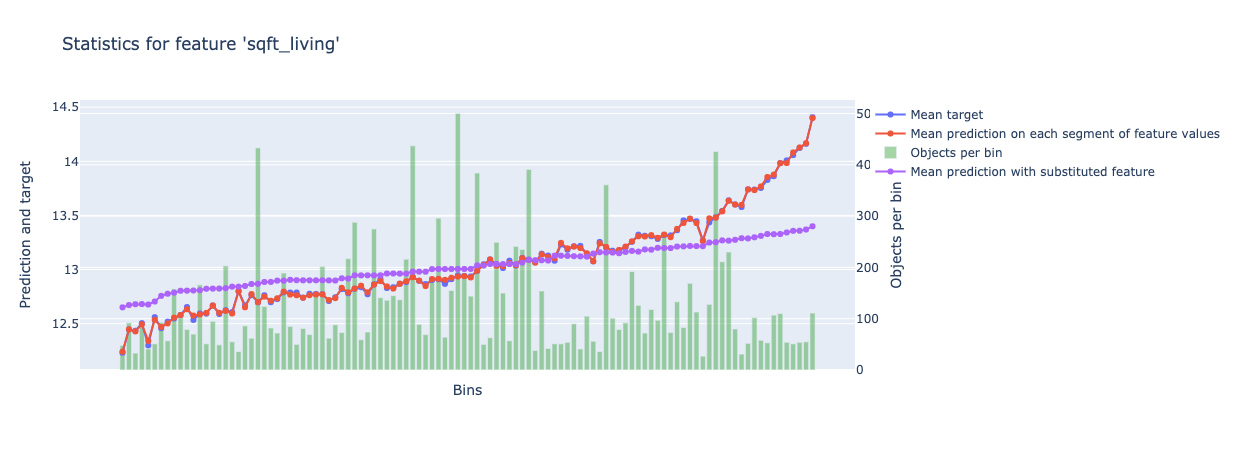

In [31]:
# float feature
feature_name = 'sqft_living'
dict_stats = model.calc_feature_statistics(df_Xtrain, ytrain, feature_name, plot=True)

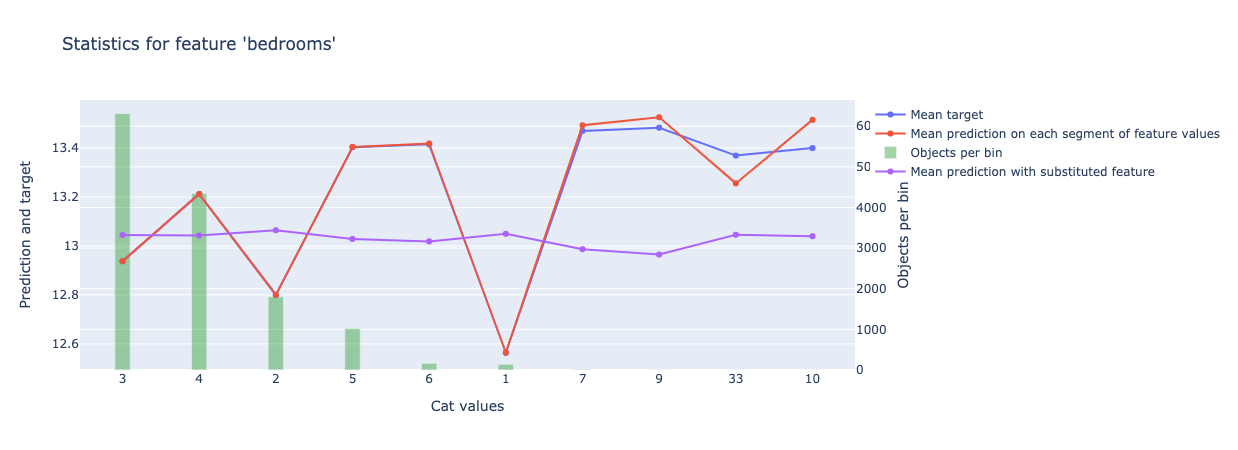

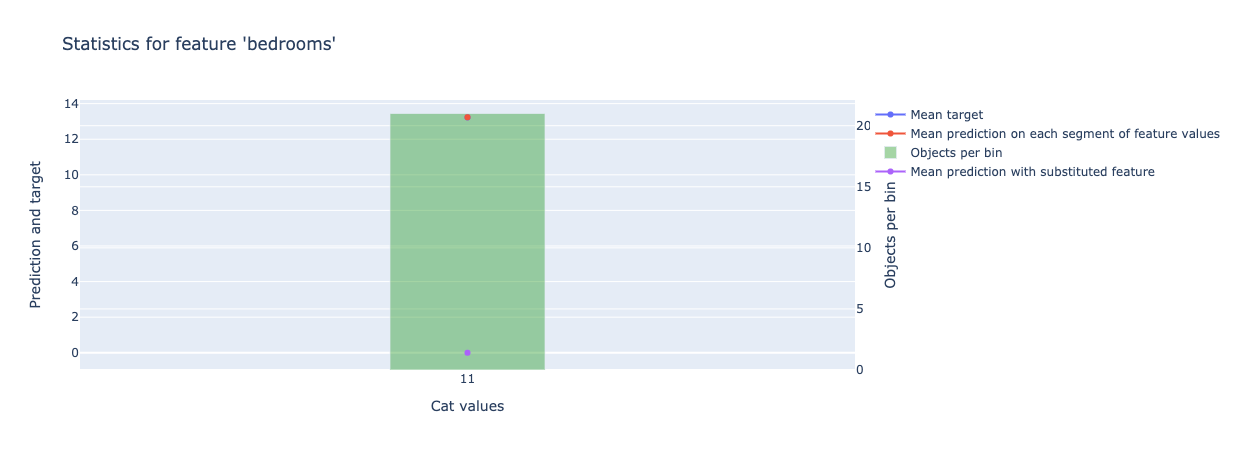

In [32]:
# one hot feature
feature_name = 'bedrooms'
cat_vals = df_Xtrain[feature_name].unique().tolist()

dict_stats = model.calc_feature_statistics(df_Xtrain, ytrain, feature_name)

In [33]:
dict_stats.keys()

dict_keys(['binarized_feature', 'mean_target', 'mean_weighted_target', 'mean_prediction', 'objects_per_bin', 'predictions_on_varying_feature', 'cat_values'])

In [34]:
for key in dict_stats.keys():
    print(key, len(dict_stats[key]))

binarized_feature 13832
mean_target 11
mean_weighted_target 0
mean_prediction 11
objects_per_bin 11
predictions_on_varying_feature 11
cat_values 11


In [35]:
df_Xtrain['bedrooms'].unique()

array([ 5,  3,  2,  1,  4,  6,  7,  8,  9,  0, 33, 11, 10])

In [36]:
df_Xtrain['bedrooms'].nunique()

13

# Feature Importance


In [37]:
# show_method_attributes(model)

In [38]:
# feature importance
df_imp = pd.DataFrame({'Feature': features_raw_all,
                       'Importance': model.feature_importances_
                       }) 

df_imp.sort_values('Importance',ascending=False).style.background_gradient()

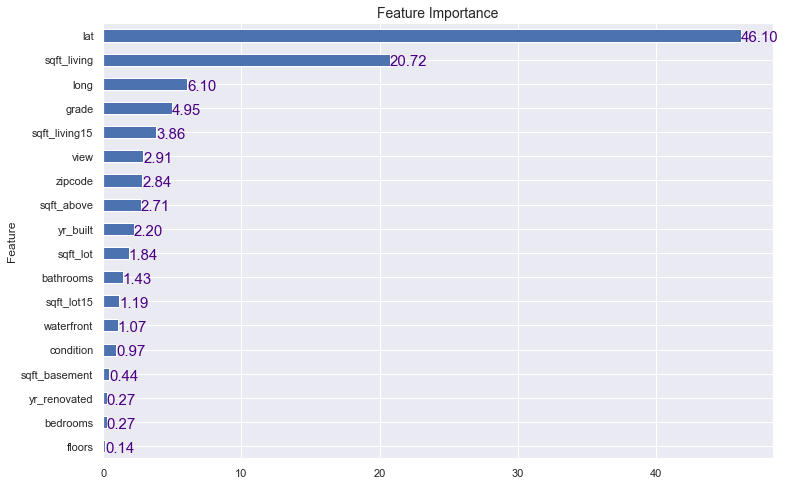

In [39]:
def plot_feature_imp_catboost(model_catboost,features):
    """Plot the feature importance horizontal bar plot.
    
    """

    df_imp = pd.DataFrame({'Feature': model.feature_names_,
                        'Importance': model.feature_importances_
                        }) 

    df_imp = df_imp.sort_values('Importance').set_index('Feature')
    ax = df_imp.plot.barh(figsize=(12,8))

    plt.grid(True)
    plt.title('Feature Importance',fontsize=14)
    ax.get_legend().remove()

    for p in ax.patches:
        x = p.get_width()
        y = p.get_y()
        text = '{:.2f}'.format(p.get_width())
        ax.text(x, y,text,fontsize=15,color='indigo')

    plt.show()

plot_feature_imp_catboost(model, features_raw_all)

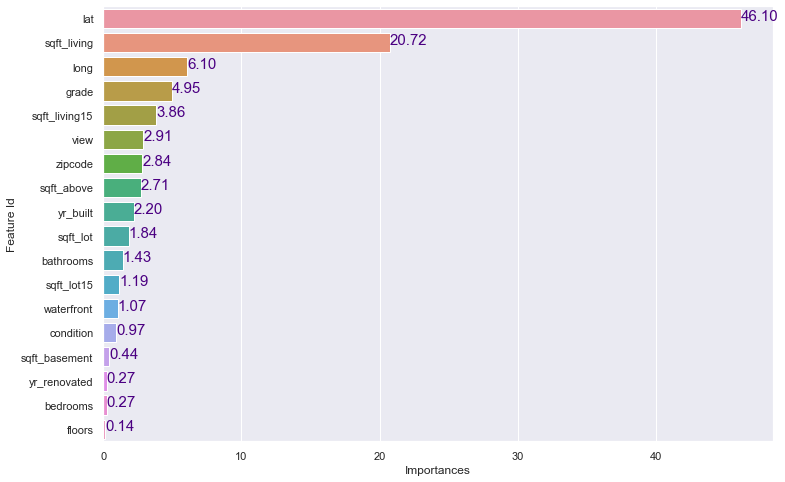

In [40]:
df_fimp = model.get_feature_importance(prettified=True)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Importances", y="Feature Id", data=df_fimp);

for p in ax.patches:
    x = p.get_width()
    y = p.get_y()
    text = '{:.2f}'.format(p.get_width())
    ax.text(x, y,text,fontsize=15,color='indigo',va='top',ha='left')

# Tree Plot

- [catboost tutorials model analysis](https://github.com/catboost/tutorials/tree/master/model_analysis)

In [41]:
show_methods(model)

Object Type: <class 'catboost.core.CatBoostRegressor'>



0                     1                        2  \
0          best_iteration_  drop_unused_features           get_best_score   
1              best_score_          eval_metrics              get_borders   
2  calc_feature_statistics         evals_result_  get_cat_feature_indices   
3        calc_leaf_indexes  feature_importances_         get_evals_result   
4                 classes_        feature_names_   get_feature_importance   
5                  compare                   fit          get_leaf_values   
6                     copy        get_all_params         get_leaf_weights   
7     create_metric_calcer    get_best_iteration             get_metadata   

                          3                        4                  5  \
0     get_object_importance              grid_search          plot_tree   
1                 get_param                is_fitted            predict   
2                get_params     iterate_leaf_indexes       random_seed_   
3        get_scale_and_bias           learning_rate_  randomized_search   
4             get_test_eval               load_model       save_borders   
5            get_test_evals  plot_partial_dependence         save_model   
6  get_text_feature_indices         plot_predictions              score   
7      get_tree_leaf_counts                                               

                    6  
0   set_feature_names  
1     set_leaf_values  
2          set_params  
3  set_scale_and_bias  
4              shrink  
5      staged_predict  
6         tree_count_  
7

In [42]:
# model.plot_tree(4)
# WARNING: This crashes the google colab, do not use it (Nov 23, 2019)

In [43]:
# this takes long time maybe 1 or 2 hours, I did not waited,
# but did not crash until about 10 minutes.

# Xtr = Xtrain
# Xtx = Xtest
# ytr,ytx = ytrain, ytest

# pool = Pool(Xtr, ytr, cat_features=[], feature_names=features_raw_all)

# model = CatBoostClassifier(
#     max_depth=2, verbose=False, max_ctr_complexity=1, iterations=2).fit(pool)

# model.plot_tree(
#     tree_idx=0,
#     pool=pool
# )


# Metric Visualizer
- [metric visualizer](https://catboost.ai/docs/concepts/python-reference_catboostipythonwidget.html)

```python
import catboost
from catboost import CatBoostClassifier

# part 1: fit the model
cat_features = [0,1,2]

train_data = [["a", "b", 1, 4, 5, 6],
              ["a", "b", 4, 5, 6, 7],
              ["c", "d", 30, 40, 50, 60]]

train_labels = [1,1,0]

model = CatBoostClassifier(iterations=20, 
                           loss_function = "CrossEntropy", 
                           train_dir = "crossentropy")

model.fit(train_data, train_labels, cat_features)
predictions = model.predict(train_data)


# part 2: visualize
w = catboost.MetricVisualizer('/crossentropy/')
w.start()
```

Part 1 works in google colab and gives some files in the directory crossentroy but part2 keeps running for infinite time.



# catboost using Pool

- [object_importance_tutorial](https://github.com/catboost/tutorials/blob/master/model_analysis/object_importance_tutorial.ipynb)

In [44]:
from catboost import CatBoost, Pool

In [45]:
df_Xtrain.head(2)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393

In [46]:
cat_features = [] # take it empty for the moment
dtrain = Pool(Xtrain, ytrain, cat_features=cat_features)
dvalid = Pool(Xvalid, yvalid, cat_features=cat_features)
dtest = Pool(Xtest, ytest, cat_features=cat_features)

In [47]:
params = {'iterations': 100, 'verbose': False, 'random_seed': 0}
bst_cat = CatBoost(params=params)
bst_cat.fit(dtrain);
print(bst_cat.eval_metrics(dvalid, ['RMSE'])['RMSE'][-1])

0.16575619204389813


In [48]:
# show_methods(bst_cat)

In [49]:
ypreds = bst_cat.predict(dtest)

# NOTE: if we have log1p transform the target, we need to get it back
ytx_back = np.expm1(ytx)
ypreds_back = np.expm1(ypreds)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx_back, ypreds_back)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print('Adusted R-squared value ', ar2)

Adusted R-squared value  0.9021232924760819


In [50]:
# bst_cat.plot_tree(tree_idx=0) # !!! Crashes Google Colab!!!

## Cross Validation
- [Catboost CV](https://catboost.ai/docs/concepts/python-usages-examples.html)
- [Catboost Jupyter Notebook visulization](https://catboost.ai/docs/features/visualization_jupyter-notebook.html)

```python
cv(pool=None, params=None, dtrain=None, iterations=None, 
num_boost_round=None, fold_count=None, nfold=None, inverted=False,
partition_random_seed=0, seed=None, shuffle=True, logging_level=None,
stratified=None, as_pandas=True, metric_period=None, verbose=None,
verbose_eval=None, plot=False, early_stopping_rounds=None,
save_snapshot=None, snapshot_file=None,
snapshot_interval=None, folds=None, type='Classical')
```

In [51]:
# help(catboost.cv)

In [52]:
params = {'iterations': 100, 'verbose': False, 'random_seed': 0,'loss_function': 'RMSE'}

df_scores = catboost.cv(dtrain,
            params,
            fold_count=2,
            verbose=100,
            plot="True") # plot does not work in google colab

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 12.6649445	test: 12.6650182	best: 12.6650182 (0)	total: 13.5ms	remaining: 1.34s
99:	learn: 0.7058337	test: 0.7174181	best: 0.7174181 (99)	total: 1.43s	remaining: 0us


In [53]:
print(df_scores.columns)
df_scores.head()

Index(['iterations', 'test-RMSE-mean', 'test-RMSE-std', 'train-RMSE-mean',
       'train-RMSE-std'],
      dtype='object')


iterations  test-RMSE-mean  test-RMSE-std  train-RMSE-mean  train-RMSE-std
0           0       12.665018       0.009988        12.664945        0.009306
1           1       12.286175       0.010208        12.286096        0.009024
2           2       11.924383       0.009950        11.923869        0.008671
3           3       11.573240       0.010092        11.572335        0.008365
4           4       11.230261       0.010027        11.229196        0.008049

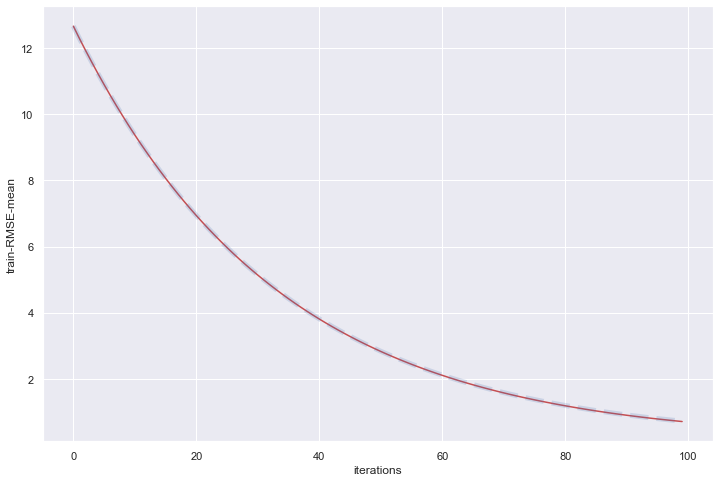

In [54]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.lineplot(x='iterations',y='train-RMSE-mean',data=df_scores,ax=ax,color='r')
sns.lineplot(x='iterations',y='test-RMSE-mean',data=df_scores,ax=ax,color='b',alpha=0.2,linewidth=5,linestyle='--')

# Model Evaluation Using shap
- [official shap github repo](https://github.com/slundberg/shap)
- [catboost tutorials model analysis shap values tutorial](https://github.com/catboost/tutorials/blob/master/model_analysis/shap_values_tutorial.ipynb)
- [Kaggle: Machine Learning Interpretability](https://www.kaggle.com/datacog314/tutorial-machine-learning-interpretability/comments)

In [55]:
import shap

In [56]:
# fit the model
model = CatBoostRegressor(verbose=1000,random_state=0)
model.fit(df_Xtrain, ytr)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_Xtest)

Learning rate set to 0.062299
0:	learn: 0.5034625	total: 30ms	remaining: 29.9s
999:	learn: 0.1265719	total: 9.04s	remaining: 0us


/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/shap/explainers/tree.py:114: UserWarning:

Setting feature_perturbation = "tree_path_dependent" because no background data was given.



In [57]:
shap_values.shape, df_Xtest.shape, df_Xtrain.shape

((4323, 18), (4323, 18), (13832, 18))

In [58]:
df_Xtest.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        2.5     7.798933  8.544225     2.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7      2437.0            0.0    2011.0           0.0   

   zipcode      lat    long  sqft_living15  sqft_lot15  
0    98002  47.3517 -122.21       7.798933    8.437067

In [59]:
df_Xtest.head(1)[['yr_built','sqft_living','lat','grade']]

yr_built  sqft_living      lat  grade
0    2011.0     7.798933  47.3517      7

In [60]:
# load JS visualization code to notebook
shap.initjs()

# Look only first row of test data
# use matplotlib=True to avoid Javascript
shap.force_plot(explainer.expected_value,
                shap_values[0,:],
                df_Xtest.iloc[0,:],
                matplotlib=False,
                text_rotation=90)

In [61]:
# the prediction for first row is 12.66 which is due to alll columns.
#
# red features contribute positive, blue features contribute negative.
# here, first row has sqft_living = 7.799, which is a good value it makes prediction higher 
# but, lat = 47.34 makes the label prediction lower

In [62]:
# load JS visualization code to notebook
shap.initjs()

# visualize the test set predictions
shap.force_plot(explainer.expected_value, shap_values, df_Xtest,matplotlib=False)

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/shap/plots/force.py:145: UserWarning:

shap.force_plot is slow for many thousands of rows, try subsampling your data.



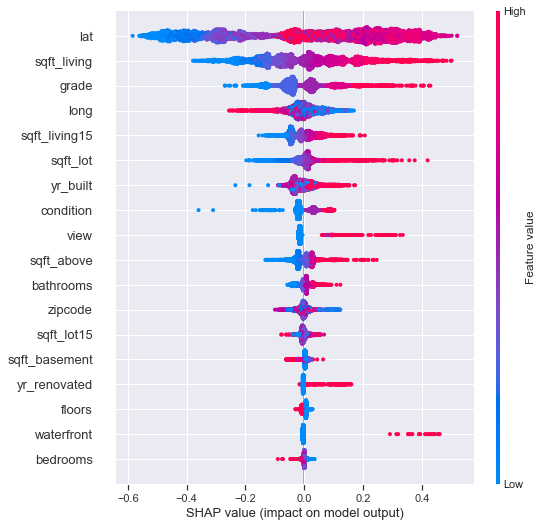

In [63]:
shap.summary_plot(shap_values, df_Xtest)

This plot is made of many dots. Each dot has three characteristics:

- Vertical location shows what feature it is depicting
- Color shows whether that feature was high or low for that row of the dataset
- Horizontal location shows whether the effect of that value caused a higher or lower prediction.

For example, the point in the upper right was for a team that has high latitude, increasing the prediction by 2.0.

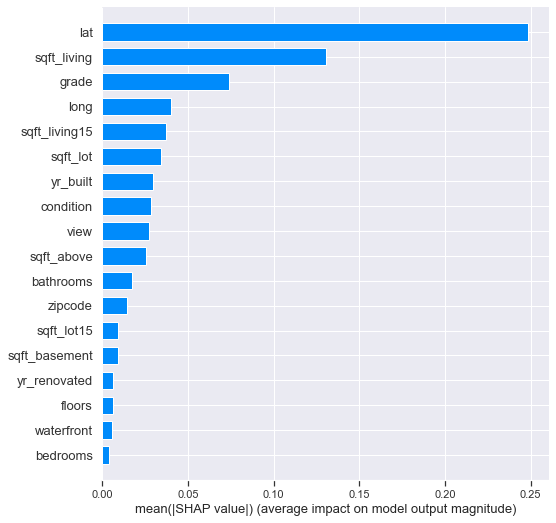

In [64]:
shap.summary_plot(shap_values, df_Xtest, plot_type='bar')

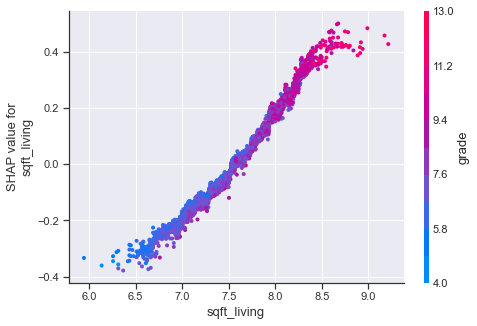

In [65]:
shap.dependence_plot("sqft_living", shap_values, df_Xtest)

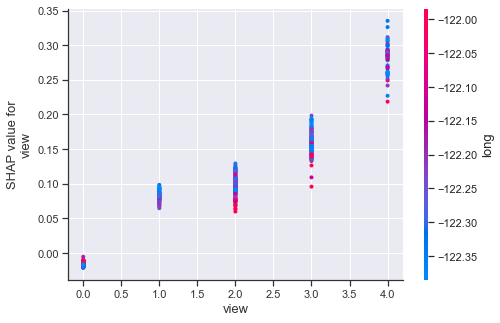

In [66]:
shap.dependence_plot("view", shap_values, df_Xtest)

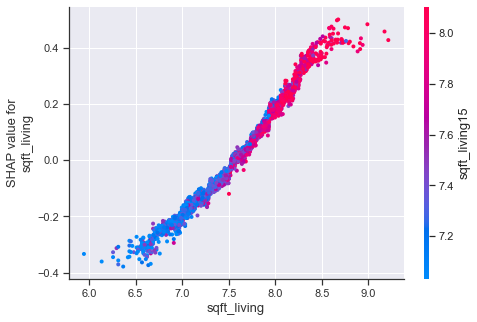

In [67]:
shap.dependence_plot(ind='sqft_living', interaction_index='sqft_living15',
                     shap_values=shap_values, 
                     features=df_Xtest,  
                     display_features=df_Xtest)

# HPO (Hyper Parameter Optimization)

We generally should optimize model complexity and then tune the convergence.

model complexity: max_depth etc  
convergence: learning rate  

Parameters:
- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.


### Baseline model

In [68]:
Xtr = scaler.transform(Xtrain)
Xtx = scaler.transform(Xtest)

ytr,ytx = ytrain, ytest

In [69]:
# fit the model
model_cat = CatBoostRegressor(verbose=1000,random_state=0)

model_cat.fit(Xtr, ytr)

# fitted model
model = model_cat

# ypreds
ypreds = model.predict(Xtx)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print('Adjusted R-squared value for test', ar2)

Learning rate set to 0.062299
0:	learn: 0.5034625	total: 31.5ms	remaining: 31.5s
999:	learn: 0.1265719	total: 6.83s	remaining: 0us
Adjusted R-squared value for test 0.9126793683431231


In [70]:
# show_methods(model)
# model.get_all_params()

In [71]:
"""
First check some iterations:
1000 = 0.9091745470144424 # default iterations = 1000
2000 = 0.9121352344981736
3000 = 0.9126262506236912
4000 = 0.9123204650792888
"""
time_start = time.time()


model = CatBoostRegressor(verbose=False,random_state=0,iterations=3_000)
model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

print('Adjusted R-squared value for test', ar2)

Time taken: 0 min 13 secs
Adjusted R-squared value for test 0.9131835078356728


# HPO Model Complexity

In [72]:
for n in [7]: # default detpth = 6

    model = CatBoostRegressor(verbose=False,random_state=0,
                              iterations=3_000,
                              depth=n,
                              )
    model.fit(Xtr, ytr)
    ypreds = model.predict(Xtx)
    r2 = sklearn.metrics.r2_score(ytx, ypreds)
    ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

    print( round(n,6), round(ar2,6))

"""
2 0.900063
3 0.908837
4 0.911563
5 0.912822
6 0.912626
7 0.912898 **best
8 0.911368
9 0.909902
10 0.907586
""";

7 0.91281


## HPO Model Regularization

In [73]:
for n in [3]: # default l2_leaf_reg = 3

    model = CatBoostRegressor(verbose=False,random_state=0,
                              iterations=3_000,
                              depth=7,
                              l2_leaf_reg=n,
                              )
    model.fit(Xtr, ytr)
    ypreds = model.predict(Xtx)
    r2 = sklearn.metrics.r2_score(ytx, ypreds)
    ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

    print( round(n,6), round(ar2,6))

"""

1 0.912553
2 0.912031
3 0.912898 ** best
4 0.912124
5 0.912581
6 0.912447
7 0.912124
8 0.912724
9 0.912262
""";

3 0.912952


In [74]:
model = CatBoostRegressor(verbose=False,random_state=0,
                            iterations=3_000,
                            depth=7,
                            )

# do not fit the model here
# let the grid search fit itself.

grid = {'learning_rate': [0.03, 0.1], # 0.02999999933
        'subsample': [0.8, 0.7, 0.6,0.85,0.9,1], # default 0.8

        }

grid = {'learning_rate': [0.03], # 0.02999999933
        'subsample': [1], # default 0.8, grid search gave me 1 but still 0.8 works better

        }

dict_grid_search_result = model.grid_search(grid,
                                       X=Xtr, 
                                       y=ytr, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.1778722437
bestIteration = 2998

0:	loss: 0.1778722	best: 0.1778722 (0)	total: 14.3s	remaining: 0us
Estimating final quality...


In [75]:
dict_grid_search_result.keys()

dict_keys(['params', 'cv_results'])

In [76]:
dict_grid_search_result['params']

{'subsample': 1, 'learning_rate': 0.03}

In [77]:
dict_cv_results = dict_grid_search_result['cv_results']

dict_cv_results.keys()

dict_keys(['iterations', 'test-RMSE-mean', 'test-RMSE-std', 'train-RMSE-mean', 'train-RMSE-std'])

In [78]:
df_grid_search_cv = pd.DataFrame(dict_cv_results)

df_grid_search_cv.head()

iterations  test-RMSE-mean  test-RMSE-std  train-RMSE-mean  train-RMSE-std
0           0       12.666026       0.007133        12.665871        0.003548
1           1       12.288965       0.007672        12.288813        0.003236
2           2       11.924768       0.007758        11.924433        0.003151
3           3       11.571655       0.008045        11.571022        0.003094
4           4       11.232295       0.008737        11.231073        0.003860

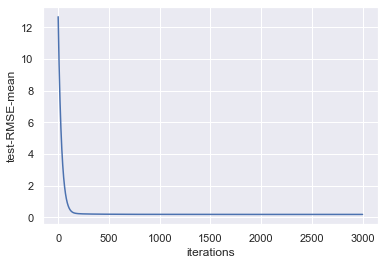

In [79]:
sns.lineplot(x='iterations',y='test-RMSE-mean', data=df_grid_search_cv)

In [80]:
model = CatBoostRegressor(verbose=False,random_state=0,
                            iterations=3_000,
                            depth=7,
                            l2_leaf_reg=3,
                            learning_rate= 0.03,
                            subsample= 1, # grid search subsamples gave me lower result
                            )
model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0.912586


In [81]:
model = CatBoostRegressor(verbose=False,random_state=0,
                            iterations=3_000,
                            depth=7,
                            l2_leaf_reg=3,
                            learning_rate= 0.03,
                            subsample= 0.8, # default
                            )
model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0.912952


## Using Early Stopping from Validation Set

In [82]:
params = dict(verbose=500,
              random_state=0,
              iterations=3_000,
              depth=7,
              l2_leaf_reg=3,
              learning_rate= 0.03,
              subsample= 0.8,
              eval_metric='RMSE',
              cat_features = ['bedrooms','view','condition',],
              early_stopping_rounds=200,
            )


model = catboost.CatBoostRegressor(**params)

model.fit(df_Xtrain, ytrain, 
          eval_set=(df_Xvalid, yvalid), 
          use_best_model=True, 
          plot=False
         );

0:	learn: 0.5149357	test: 0.5149538	best: 0.5149538 (0)	total: 83.4ms	remaining: 4m 10s
500:	learn: 0.1538359	test: 0.1655847	best: 0.1655847 (500)	total: 12.8s	remaining: 1m 4s
1000:	learn: 0.1388587	test: 0.1613674	best: 0.1613674 (1000)	total: 19.8s	remaining: 39.5s
1500:	learn: 0.1285596	test: 0.1599794	best: 0.1599794 (1500)	total: 28.2s	remaining: 28.2s
2000:	learn: 0.1207326	test: 0.1593713	best: 0.1593681 (1994)	total: 35.8s	remaining: 17.9s
2500:	learn: 0.1144021	test: 0.1590253	best: 0.1590253 (2500)	total: 44.1s	remaining: 8.79s
2999:	learn: 0.1089229	test: 0.1589522	best: 0.1589136 (2853)	total: 51.7s	remaining: 0us

bestTest = 0.1589136044
bestIteration = 2853

Shrink model to first 2854 iterations.


In [83]:
model.get_params()

{'iterations': 3000,
 'learning_rate': 0.03,
 'depth': 7,
 'l2_leaf_reg': 3,
 'loss_function': 'RMSE',
 'verbose': 500,
 'eval_metric': 'RMSE',
 'subsample': 0.8,
 'random_state': 0,
 'early_stopping_rounds': 200,
 'cat_features': ['bedrooms', 'view', 'condition']}

In [84]:
params = model.get_params()
params['iterations'] = 2503
params['cat_features'] = []

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0:	learn: 0.5150564	total: 69.7ms	remaining: 2m 54s
500:	learn: 0.1526974	total: 3.17s	remaining: 12.7s
1000:	learn: 0.1368659	total: 6.31s	remaining: 9.46s
1500:	learn: 0.1261848	total: 9.2s	remaining: 6.14s
2000:	learn: 0.1179135	total: 12s	remaining: 3.02s
2500:	learn: 0.1105720	total: 15.6s	remaining: 12.5ms
2502:	learn: 0.1105625	total: 15.6s	remaining: 0us
0.913002


## Use Categorical Features

In [85]:
df_Xtrain.head(2)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393

In [86]:
"""
all categories except float bathrooms and floors = 0.913583

"""

Xtr = df_Xtrain
Xtx = df_Xtest

params ={'depth': 7,
 'early_stopping_rounds': 200,
 'eval_metric': 'RMSE',
 'iterations': 3000,
 'l2_leaf_reg': 3,
 'learning_rate': 0.03,
 'loss_function': 'RMSE',
 'random_state': 0,
 'subsample': 0.8,
 'verbose': 500}

params['iterations'] = 2503

lst_cat_features = ['bedrooms','waterfront','view','condition','grade','zipcode']
params['cat_features'] = lst_cat_features

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0:	learn: 0.5151395	total: 139ms	remaining: 5m 48s
500:	learn: 0.1550735	total: 10.7s	remaining: 42.8s
1000:	learn: 0.1395400	total: 19.5s	remaining: 29.2s
1500:	learn: 0.1296435	total: 28.1s	remaining: 18.8s
2000:	learn: 0.1218168	total: 36.9s	remaining: 9.26s
2500:	learn: 0.1152599	total: 46.9s	remaining: 37.5ms
2502:	learn: 0.1152402	total: 47s	remaining: 0us
0.913905


## Log and Scaling non categorical features

In [87]:
non_cat_features = df_Xtrain.columns.drop(lst_cat_features)
non_cat_features

Index(['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [88]:
cols_log = [ 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement',
       'sqft_living15', 'sqft_lot15']

In [89]:
df_Xtrain_log = df_Xtrain.copy()
df_Xtest_log = df_Xtest.copy()
df_Xvalid_log = df_Xvalid.copy()

In [90]:
df_Xtrain.isnull().sum().sum(), df_Xtest.isnull().sum().sum(), df_Xvalid.isnull().sum().sum()

(0, 0, 0)

In [91]:
for c in cols_log:
    df_Xtrain_log[c] = df_Xtrain_log[c].to_numpy().astype(float)
    df_Xtest_log[c] = df_Xtest_log[c].to_numpy().astype(float)
    df_Xvalid_log[c] = df_Xvalid_log[c].to_numpy().astype(float)

    df_Xtrain_log[c] = np.log1p(df_Xtrain_log[c].to_numpy())
    df_Xtest_log[c] = np.log1p(df_Xtest_log[c].to_numpy())
    df_Xvalid_log[c] = np.log1p(df_Xvalid_log[c].to_numpy())

In [92]:
Xtr = df_Xtrain_log
Xtx = df_Xtest_log

params = {'depth': 7,
        'early_stopping_rounds': 200,
        'eval_metric': 'RMSE',
        'iterations': 2503,
        'l2_leaf_reg': 3,
        'learning_rate': 0.03,
        'loss_function': 'RMSE',
        'random_state': 0,
        'subsample': 0.8,
        'verbose': 500
}

lst_cat_features = ['bedrooms','waterfront','view','condition','grade','zipcode']
params['cat_features'] = lst_cat_features

"""
all categories except float bathrooms and floors = 0.913582
log transform few features                       = 0.913582

"""

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0:	learn: 0.5151395	total: 111ms	remaining: 4m 37s
500:	learn: 0.1550735	total: 10.2s	remaining: 40.8s
1000:	learn: 0.1395400	total: 22.9s	remaining: 34.3s
1500:	learn: 0.1296435	total: 31.5s	remaining: 21.1s
2000:	learn: 0.1218168	total: 43.4s	remaining: 10.9s
2500:	learn: 0.1152599	total: 1m	remaining: 48.1ms
2502:	learn: 0.1152402	total: 1m	remaining: 0us
0.913906


In [93]:
for c in cols_log:
    df_Xtrain_log[c] = (df_Xtrain_log[c] - df_Xtrain_log[c].mean()) / df_Xtrain_log[c].std()
    df_Xtest_log[c] = (df_Xtest_log[c] - df_Xtest_log[c].mean()) / df_Xtest_log[c].std()


In [94]:
"""
all categories except float bathrooms and floors = 0.913583
log transform few features                       = 0.90657
log transform few features + normalize           = 0.913443

For tree based model, log+scaling did not help at all. Instead reduced acc.
"""



Xtr = df_Xtrain_log
Xtx = df_Xtest_log

params = {'depth': 7,
        'early_stopping_rounds': 200,
        'eval_metric': 'RMSE',
        'iterations': 2503,
        'l2_leaf_reg': 3,
        'learning_rate': 0.03,
        'loss_function': 'RMSE',
        'random_state': 0,
        'subsample': 0.8,
        'verbose': 500
}

lst_cat_features = ['bedrooms','waterfront','view','condition','grade','zipcode']
params['cat_features'] = lst_cat_features

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0:	learn: 0.5151395	total: 48.3ms	remaining: 2m
500:	learn: 0.1550735	total: 11.5s	remaining: 46s
1000:	learn: 0.1395400	total: 19.1s	remaining: 28.7s
1500:	learn: 0.1296435	total: 30.4s	remaining: 20.3s
2000:	learn: 0.1218168	total: 40.4s	remaining: 10.1s
2500:	learn: 0.1152599	total: 49.6s	remaining: 39.7ms
2502:	learn: 0.1152402	total: 49.7s	remaining: 0us
0.913845


## Adding Polynomial Features

In [95]:
from sklearn.preprocessing import PolynomialFeatures

polyfeat = PolynomialFeatures(degree=2, interaction_only=True)

Xtrain_poly = polyfeat.fit_transform(df_Xtrain)
Xtest_poly = polyfeat.fit_transform(df_Xtest)

Xtrain.shape, Xtest.shape, Xtrain_poly.shape, Xtest_poly.shape

((13832, 18), (4323, 18), (13832, 172), (4323, 172))

In [96]:
lst_names = polyfeat.get_feature_names()
lst_names

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x1 x15',
 'x1 x16',
 'x1 x17',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x2 x15',
 'x2 x16',
 'x2 x17',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x3 x14',
 'x3 x15',
 'x3 x16',
 'x3 x17',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x4 x14',
 'x4 x15',
 'x4 x16',
 'x4 x17',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x5 x14',
 'x5 x15',
 'x5 x16',
 'x5 x17',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x6 x13',
 'x6 x14',
 'x6 x15',
 'x6 x16',
 'x6 x17',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x7 x13',
 'x7 x14',
 'x7 x15',
 'x7 x16',
 'x7 x17',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x8 x13',
 'x8 x14',
 'x8 x15',
 'x8 x16',
 'x8 x17',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x9 x13',
 'x9 x14',
 'x9 x15',
 'x9 x16',
 'x9 x17',
 'x10 x11',
 'x10 x12',
 'x10 x13',
 'x10 x14',
 'x10 x15',
 'x10 x16',
 'x10 x17',
 'x11 x12',
 'x11 x13',
 'x11 x14',
 'x11 x15',
 'x11 x16',
 'x11 x17',
 'x12 x13',
 'x12 x14',
 'x12 x15',
 'x12 x16',
 'x12 x17',
 'x13 x14',
 'x13 x15',
 'x13 x16',
 'x13 x17',
 'x14 x15',
 'x14 x16',
 'x14 x17',
 'x15 x16',
 'x15 x17',
 'x16 x17']

In [97]:
pd.DataFrame(Xtrain_poly[:5,:])

0    1     2         3          4    5    6    7    8    9    ...  \
0  1.0  5.0  3.00  8.243019  10.652944  1.5  0.0  0.0  4.0  9.0  ...   
1  1.0  3.0  2.50  7.890208   8.517393  2.0  0.0  3.0  5.0  9.0  ...   
2  1.0  2.0  1.00  7.359468   8.456381  1.5  0.0  1.0  3.0  8.0  ...   
3  1.0  1.0  0.75  6.381816   8.639588  1.0  0.0  0.0  3.0  6.0  ...   
4  1.0  3.0  1.00  7.123673   8.294300  1.5  0.0  0.0  3.0  8.0  ...   

            162           163            164           165          166  \
0  4.642171e+06 -1.197044e+07  770211.304725  1.027974e+06 -5781.051736   
1  4.670231e+06 -1.200223e+07  760591.798305  8.359310e+05 -5819.325966   
2  4.663972e+06 -1.201106e+07  736720.797000  8.298754e+05 -5816.753235   
3  4.662381e+06 -1.199659e+07  675892.952588  8.476991e+05 -5809.895533   
4  4.664617e+06 -1.200415e+07  695660.799005  9.596505e+05 -5817.766665   

          167         168         169          170        171  
0  371.968963  496.453710 -959.170042 -1280.170050  82.369705  
1  368.775891  405.304413 -947.732844 -1041.609046  66.007697  
2  356.781384  401.894583 -918.814011 -1034.993390  63.483246  
3  327.331875  410.536797 -842.245089 -1056.336481  59.514427  
4  337.149362  465.090969 -867.636635 -1196.887815  69.361662  

[5 rows x 172 columns]

In [98]:
df_Xtrain.head(2)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393

In [99]:
"""
deg 2                   = 0.90771
deg 2, interaction only = 0.90655

"""

Xtr = Xtrain_poly
Xtx = Xtest_poly

params = {'depth': 7,
        'early_stopping_rounds': 200,
        'eval_metric': 'RMSE',
        'l2_leaf_reg': 3,
        'learning_rate': 0.03,
        'loss_function': 'RMSE',
        'random_state': 0,
        'subsample': 0.8,
        'verbose': 500,
        'iterations': 2503
}

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0:	learn: 0.5150549	total: 160ms	remaining: 6m 39s
500:	learn: 0.1508507	total: 21.4s	remaining: 1m 25s
1000:	learn: 0.1324191	total: 45.1s	remaining: 1m 7s
1500:	learn: 0.1200658	total: 1m 6s	remaining: 44.6s
2000:	learn: 0.1101892	total: 1m 34s	remaining: 23.7s
2500:	learn: 0.1018829	total: 1m 55s	remaining: 92.1ms
2502:	learn: 0.1018511	total: 1m 55s	remaining: 0us
0.906852


# Try Your luck with different random states

In [101]:
# [0, 42, 100, 314, 31416, 123, 12345, 111]
for n in [123]:

    Xtr = df_Xtrain
    Xtx = df_Xtest

    params ={'depth': 7,
    'early_stopping_rounds': 200,
    'eval_metric': 'RMSE',
    'iterations':2503,
    'l2_leaf_reg': 3,
    'learning_rate': 0.03,
    'loss_function': 'RMSE',
    'random_state': n,
    'subsample': 0.8,
    'verbose': False}

    lst_cat_features = ['bedrooms','waterfront','view','condition','grade','zipcode']
    params['cat_features'] = lst_cat_features

    model = catboost.CatBoostRegressor(**params)

    model.fit(Xtr, ytr)
    ypreds = model.predict(Xtx)
    r2 = sklearn.metrics.r2_score(ytx, ypreds)
    ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

    print( n, round(ar2,6))

123 0.913907


# Best Model

In [102]:
Xtr = df_Xtrain
Xtx = df_Xtest

params ={'depth': 7,
'early_stopping_rounds': 200,
'eval_metric': 'RMSE',
'iterations':2503,
'l2_leaf_reg': 3,
'learning_rate': 0.03,
'loss_function': 'RMSE',
'random_state': 123,
'subsample': 0.8,
'verbose': False}

lst_cat_features = ['bedrooms','waterfront','view','condition','grade','zipcode']
params['cat_features'] = lst_cat_features

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)

# NOTE: if we have log1p transform the target, we need to get it back
ytx_back = np.expm1(ytx)
ypreds_back = np.expm1(ypreds)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx_back, ypreds_back)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( n, round(ar2,6))

123 0.909695


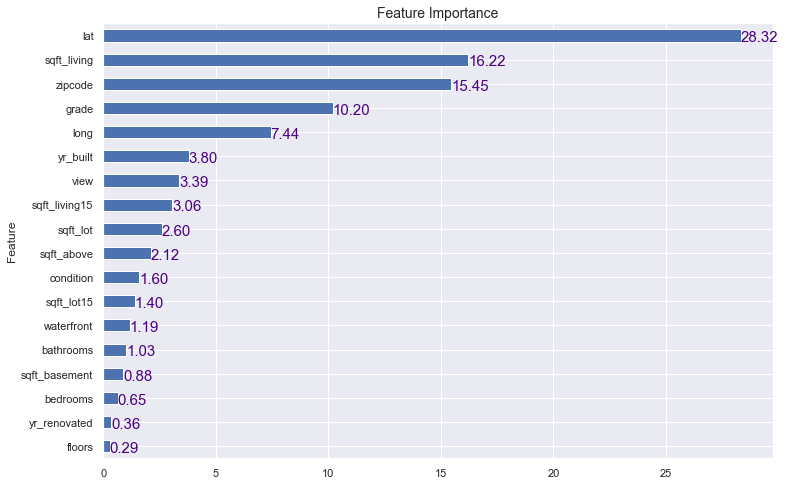

In [103]:
plot_feature_imp_catboost(model, features_raw_all)

In [104]:
import eli5

eli5.show_weights(model)

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



In [105]:
df_fimp = model.get_feature_importance(prettified=True)[['Importances','Feature Id']]
df_fimp.style.background_gradient(subset=['Importances'])

# Time Taken

In [106]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 16 min 0 secs
